In [7]:
!pip install pandas numpy numpy-financial FinancePy
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/09/82/5a5eee685095a6c1f8968db75bba8536baa8046c970be25e1ac91a843839/yfinance-0.2.33-py2.py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/b6/2c/e391d6d57bbd837d383a6b69b54ecb4768d75b31d8bc7a380b4b4afe4cb2/frozendict-2.3.10-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 17.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 4.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.0-cp311-cp311-macosx_11_0_arm64.whl size=245787 sha256=01c48788d49e5186ad2149800de2070a409664219a0d9c4ccf6cbe46ba7e1b55
  Stored in directory: /Users/

In [9]:
import pandas as pd
import numpy as np
import numpy_financial as npf  
import yfinance as yf

In [10]:
sp500 = yf.Ticker("^GSPC")

In [11]:
sp500 = sp500.history(period="max")

In [13]:
sp500

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-12-07 00:00:00-05:00', '2023-12-08 00:00:00-05:00',
               '2023-12-11 00:00:00-05:00', '2023-12-12 00:00:00-05:00',
               '2023-12-13 00:00:00-05:00', '2023-12-14 00:00:00-05:00',
               '2023-12-15 00:00:00-05:00', '2023-12-18 00:00:00-05:00',
               '2023-12-19 00:00:00-05:00', '2023-12-20 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24109, freq=None)

<Axes: xlabel='Date'>

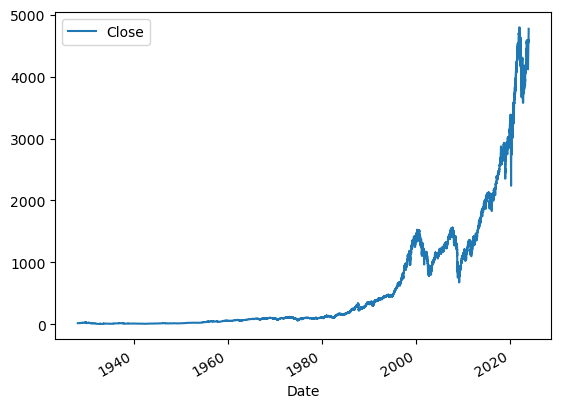

In [15]:
sp500.plot.line(y="Close", use_index=True)

In [16]:
del sp500["Dividends"]

In [17]:
del sp500["Stock Splits"]

In [18]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [19]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-12-14 00:00:00-05:00,4721.040039,4738.569824,4694.339844,4719.549805,6314040000,4719.189941
2023-12-15 00:00:00-05:00,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117


In [20]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"])

In [21]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,True
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,False
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,False
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,True
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,False
...,...,...,...,...,...,...,...
2023-12-14 00:00:00-05:00,4721.040039,4738.569824,4694.339844,4719.549805,6314040000,4719.189941,False
2023-12-15 00:00:00-05:00,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059,True
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,True


sp500 = sp500.loc["1990-01-01":].copy()

In [24]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,True
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,False
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,False
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,True
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,False
...,...,...,...,...,...,...,...
2023-12-14 00:00:00-05:00,4721.040039,4738.569824,4694.339844,4719.549805,6314040000,4719.189941,False
2023-12-15 00:00:00-05:00,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059,True
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,True


In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [28]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [29]:
import pandas as pd 

preds = pd.Series(preds, index=test.index)

In [30]:
preds

Date
2023-08-01 00:00:00-04:00     True
2023-08-02 00:00:00-04:00     True
2023-08-03 00:00:00-04:00     True
2023-08-04 00:00:00-04:00     True
2023-08-07 00:00:00-04:00     True
                             ...  
2023-12-14 00:00:00-05:00    False
2023-12-15 00:00:00-05:00    False
2023-12-18 00:00:00-05:00    False
2023-12-19 00:00:00-05:00    False
2023-12-20 00:00:00-05:00    False
Length: 100, dtype: bool

In [31]:
precision_score(test["Target"], preds)

0.49230769230769234

In [35]:
combined = pd.concat([test["Target"], preds], axis=1)

In [37]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [38]:
def backtest(data, model, predictions, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape [0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [40]:
predictions = backtest(sp500, model, predictors)

In [43]:
predictions["Predictions"].value_counts()

Predictions
False    12176
True      9433
Name: count, dtype: int64

In [42]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5166967030637125

In [45]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
True     0.52617
False    0.47383
Name: count, dtype: float64

In [47]:
horizons = [2, 5, 60, 250, 1000]
new_predictors =[]

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Trend_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [50]:
sp500 = sp500.dropna()

sp500

In [51]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Trend_2,Trend_5,Trend_60,Trend_250,Trend_1000
Date,,,,,,,,,,,,
1931-12-29 00:00:00-05:00,7.960000,7.960000,7.960000,7.960000,0,8.100000,True,1.0,3.0,24.0,105.0,521.0
1931-12-30 00:00:00-05:00,8.100000,8.100000,8.100000,8.100000,0,8.120000,True,2.0,3.0,25.0,105.0,521.0
1931-12-31 00:00:00-05:00,8.120000,8.120000,8.120000,8.120000,0,7.560000,False,2.0,4.0,25.0,105.0,522.0
1932-01-04 00:00:00-05:00,7.560000,7.560000,7.560000,7.560000,0,7.550000,False,1.0,3.0,25.0,104.0,522.0
1932-01-05 00:00:00-05:00,7.550000,7.550000,7.550000,7.550000,0,8.080000,True,0.0,3.0,24.0,104.0,521.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-13 00:00:00-05:00,4646.200195,4709.689941,4643.229980,4707.089844,5063650000,4719.549805,True,2.0,5.0,35.0,133.0,528.0
2023-12-14 00:00:00-05:00,4721.040039,4738.569824,4694.339844,4719.549805,6314040000,4719.189941,False,2.0,5.0,36.0,134.0,529.0
2023-12-15 00:00:00-05:00,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059,True,1.0,4.0,36.0,134.0,528.0


In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [81]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors]) [:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    threshold = 0.7  
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [82]:
predictions = backtest(sp500, model, new_predictors)

In [83]:
predictions["Predictions"].value_counts()

Predictions
0.0    17381
1.0     3227
Name: count, dtype: int64

In [84]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5326929036256585

In [78]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:, 1]
    threshold = 0.7  
    preds = (preds >= threshold).astype(int)
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [79]:
predictions["Predictions"].value_counts()

Predictions
0    12112
1     8496
Name: count, dtype: int64

In [80]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5225988700564972

In [70]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:, 1]
    threshold = 0.5
    preds = (preds >= threshold).astype(int)
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined


In [71]:
predictions = backtest(sp500, model, new_predictors)

In [72]:
predictions["Predictions"].value_counts()

Predictions
0    12112
1     8496
Name: count, dtype: int64

In [73]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5225988700564972